#  `PROJET DE CLUSTERING ET ANALYSE SPATIALE DES MOUVEMENTS HUMAINS A PARTIR DE DONNEES BIOMECANIQUES EN 3 DIMENSIONS (3D) PAR MOHAMED FALILOU FALL`


-  ## `LES VARIABLES ETUDIEES`

- `La main gauche (left hand (lh) )`
- lhx	: les coordonnees `(x)` de la main gauche
- lhy	: les coordonnees `(y)` de la main gauche
- lhz	: les coordonnees `(z)` de la main gauche

- `La main droite (right hand (rh))`
- rhx	: les coordonnees `(x)` de la main droite
- rhy	: les coordonnees `(y)` de la main droite
- rhz   : les coordonnees `(z)` de la main droite

- `La tete (head (h))`
- hx	: les coordonnes `(x)` de la tete
- hy	: les coordonnees `(y)` de la tete
- hz    : les coordonnees `(z)` de la tete

- `L'epaule (shoulder (s))`
- sx	: les coordonnees `(x)` de l'epaule
- sy	: les coordonnes `(y)` de l'epaule
- sz    : les coordonnees `(z)` de l'epaule

- `Le poignet gauche (left wrist (lw))`
- lwx	: les coordonnes  `(x)` du poignet gauche
- lwy	: les coordonnes `(y)` du poignet gauche
- lwz   : les coordonnes `(z)` du poignet gauche


- `Le poignet droit (rignt wrist (rw))`
- rwx	: les coordonnees `(x)` du poignet droit
- rwy	: les coordonnes `(y)` du poignet droit
- rwz   : les coordonnees `(z)` du poignet droit

**Projet** : faire un clustering des données en utilisant les modèles KMeans, CAH, DBSCAN et GMM. Ensuite, la partition de chaque modèle sera évaluée visuellement à travers un scatter plot et par métrique (Silhouette score). Enfin, faire un comparaison globale des différents modèles.

# 1- PREPARATION ET NETTOYAGE DES DONNEES (PRE-TRAITEMENT)

## 1-1 Importation des bibliotheques requis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1-2 Importation, lecture, verification des donnees manquantes et doublons

In [ ]:
# Importation des donnees
data = pd.read_csv('Gesture_Phase_Segmentation_Data.csv')

In [ ]:
# Lecture des donnees
data.head()

,lhx,lhy,lhz,rhx,rhy,rhz,hx,hy,hz,sx,sy,sz,lwx,lwy,lwz,rwx,rwy,rwz
0,5.347435,4.363681,1.501913,5.258967,4.319263,1.488703,5.037871,1.618295,1.778350,5.062803,4.229656,1.772577,4.972902,4.301065,1.564781,5.553945,4.370456,1.553521
1,4.869622,4.254210,1.556133,5.240113,4.346338,1.554309,5.037610,1.618370,1.778573,5.061430,4.228504,1.772859,4.974908,4.303656,1.565527,5.423875,4.303708,1.569942
2,5.357447,4.364039,1.500969,5.238928,4.347924,1.554150,5.037514,1.618298,1.778774,5.059245,4.228004,1.773568,4.981612,4.305363,1.563643,5.332170,4.438061,1.572841
3,4.942886,4.281878,1.546513,5.111436,4.229660,1.527091,5.037526,1.618612,1.778855,5.056475,4.226891,1.774519,4.987158,4.304063,1.565929,5.311104,4.396774,1.566368
4,5.003160,4.278530,1.542866,4.985812,4.182155,1.520330,5.037557,1.619226,1.778925,5.052367,4.225485,1.775536,4.983912,4.296833,1.569889,5.193762,4.335417,1.560144


In [ ]:
# Informations generales
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7342 entries, 0 to 7341
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lhx     7342 non-null   float64
 1   lhy     7342 non-null   float64
 2   lhz     7342 non-null   float64
 3   rhx     7342 non-null   float64
 4   rhy     7342 non-null   float64
 5   rhz     7342 non-null   float64
 6   hx      7342 non-null   float64
 7   hy      7342 non-null   float64
 8   hz      7342 non-null   float64
 9   sx      7342 non-null   float64
 10  sy      7342 non-null   float64
 11  sz      7342 non-null   float64
 12  lwx     7342 non-null   float64
 13  lwy     7342 non-null   float64
 14  lwz     7342 non-null   float64
 15  rwx     7342 non-null   float64
 16  rwy     7342 non-null   float64
 17  rwz     7342 non-null   float64
dtypes: float64(18)
memory usage: 1.0 MB


In [ ]:
# Description des donnees
data.describe()

,lhx,lhy,lhz,rhx,rhy,rhz,hx,hy,hz,sx,sy,sz,lwx,lwy,lwz,rwx,rwy,rwz
count,7342.000000,7342.000000,7342.000000,7342.000000,7342.000000,7342.000000,7342.000000,7342.000000,7342.000000,7342.000000,7342.000000,7342.000000,7342.000000,7342.000000,7342.000000,7342.000000,7342.000000,7342.000000
mean,3.649338,4.253675,1.921977,4.599336,3.903264,1.922042,4.067696,1.983853,2.144318,4.070804,4.141542,2.156719,3.544765,4.198136,1.953578,4.665401,3.899936,1.959033
std,1.549550,0.834131,0.384956,1.116965,1.078051,0.392312,1.270839,1.363565,0.349836,1.292545,0.516648,0.364303,1.508277,0.736159,0.382884,1.111295,0.979206,0.397383
min,0.000000,0.843307,1.183290,1.882058,0.279121,1.161676,2.105279,0.780237,1.544137,2.320001,3.250836,1.695533,0.030870,1.157265,1.245345,2.178931,0.498273,1.206841
25%,2.158339,3.722686,1.503215,3.723058,3.345642,1.501637,2.584877,1.255777,1.760155,2.498779,3.920649,1.744674,1.986027,3.710277,1.541165,3.660379,3.420311,1.536715
50%,4.500918,4.237362,2.014374,4.772092,4.085724,2.034344,4.692057,1.491493,2.227505,4.691675,4.155724,2.249499,4.485060,4.175255,2.047868,4.801619,3.990086,2.084609
75%,4.890051,5.002533,2.223394,5.237468,4.833710,2.245686,5.107984,1.688167,2.408156,5.111685,4.300470,2.431532,4.737985,4.926338,2.254872,5.443161,4.721303,2.292546
max,6.429354,6.045581,2.952856,8.546903,5.587990,2.831482,6.308431,4.730422,2.748528,6.006933,4.984532,2.755043,6.083546,5.677821,2.943367,8.266059,5.244353,2.790349


In [ ]:
# Verification de l'existence des valeurs nulles
data.isnull().sum()
# Verification d l'existence des valeurs 'NaN'
data.isna().sum()

,0
lhx,0
lhy,0
lhz,0
rhx,0
rhy,0
rhz,0
hx,0
hy,0
hz,0
sx,0


In [ ]:
# Verification de l'existence de doublons
data.duplicated().sum()

np.int64(0)

## 1-3 Verification visuelle des valeurs aberantes par les boxplots

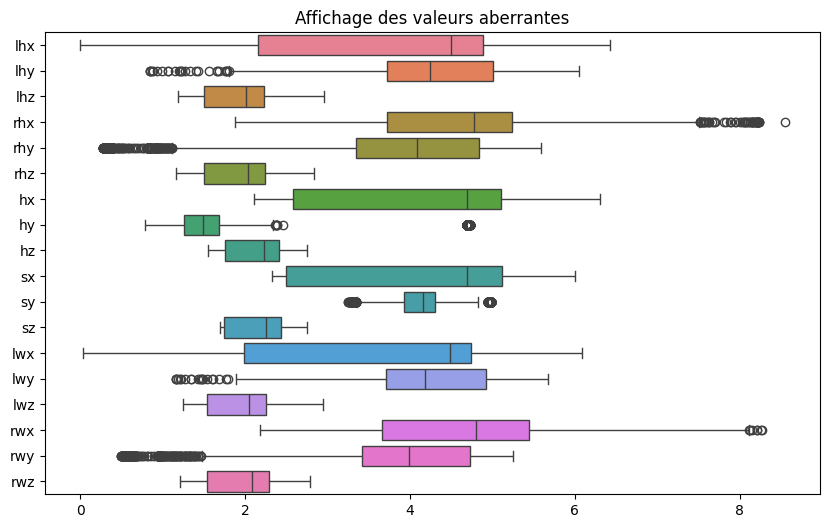

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, orient="h")
plt.title("Affichage des valeurs aberrantes")
plt.show()




## 1-4 Traitement des valeurs abberants des variables `rwy`, `rwx`, `lwy`, `sy`, `hy`, `rhy`, `rhx`, `lhy`

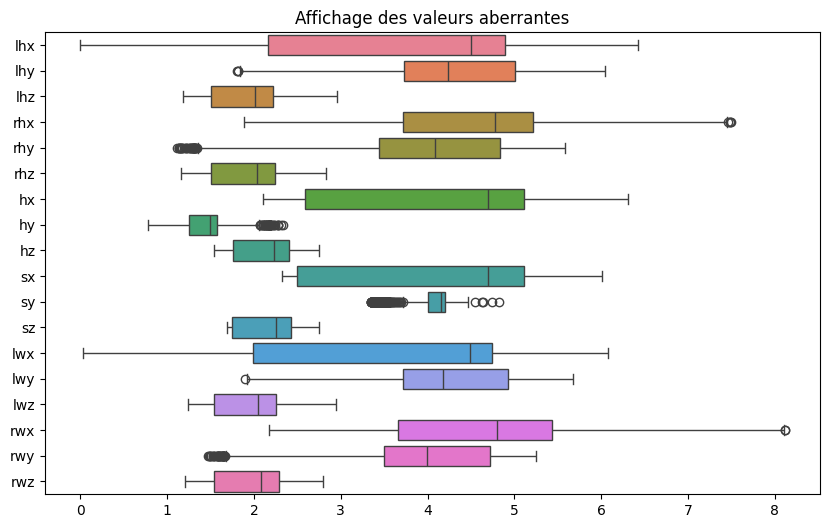

In [ ]:
# Remplacement des valeurs abberantes par la mediane
def replace_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = data[column].median()
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), median, data[column])
    return data

# Application de l'imputation des valeurs abberrantes par la mediane pour chaque variable
for column in data:
    data = replace_outliers(data, column)


# Nouvelle Affichage (verification)
plt.figure(figsize=(10,6))
sns.boxplot(data=data, orient="h")
plt.title("Affichage des valeurs aberrantes")
plt.show()




## 1-5 Normalisation des donnees

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_normalize = scaler.fit_transform(data)


In [ ]:
data_normalize

array([[ 1.09593875,  0.1218404 , -1.09127433, ...,  0.80639018,
         0.46138775, -1.02052507],
       [ 0.78756187, -0.01258688, -0.95041759, ...,  0.68877382,
         0.380988  , -0.97919944],
       [ 1.10240042,  0.12228001, -1.09372672, ...,  0.60584918,
         0.54281977, -0.97190372],
       ...,
       [ 0.6386963 ,  1.05968898,  1.42522668, ...,  0.15588681,
         1.32669682,  1.64492924],
       [ 0.634529  ,  1.05586631,  1.4600304 , ...,  0.15492921,
         1.32351205,  1.63697919],
       [ 0.63116909,  1.05638451,  1.48824851, ...,  0.15175437,
         1.34013452,  1.59672816]])

# 2- SELECTION DES CARACTERISTIQUES (REDUCTION DE DIMENSION PAR LA PCA)

In [ ]:
from sklearn.decomposition import PCA

# Instantiation du model PCA avec n_components = 2
pca = PCA(n_components= 2)

# Entrainement du model
pca.fit(data_normalize)

# Matrice des 2 composantes
comp_pca = pca.fit_transform(data_normalize)

# Dataframe des 2 composantes
New_df  = pd.DataFrame(comp_pca, columns = ['PCA1','PCA2'])

# Affichage de New_df
New_df.head()

,PCA1,PCA2
0,3.445177,0.291325
1,3.237977,0.219981
2,3.326922,0.358016
3,3.217245,0.201463
4,3.173557,0.128418


<ipython-input-15-b6a06d6dbd33>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PCA1', y='PCA2', data=New_df, s=70, palette='viridis')


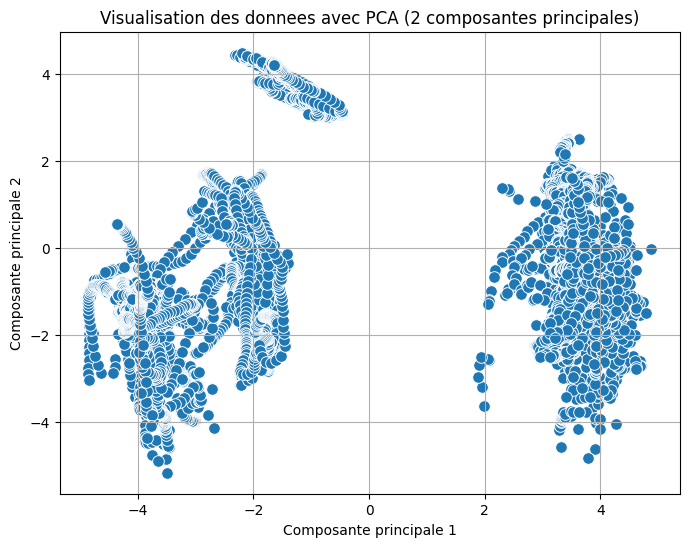

In [ ]:
# Visualisation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=New_df, s=70, palette='viridis')


plt.title('Visualisation des donnees avec PCA (2 composantes principales)')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.grid(True)
plt.show()

In [ ]:
# Part de variance des composantes principales
round(sum(pca.explained_variance_ratio_)*100,2)

np.float64(81.05)

# 3- KMEANS

In [ ]:
# Importation de  KMeans scikit learn
from sklearn.cluster import KMeans

In [ ]:
# L'inertie intra pour k variant de 1 a 10
inertie_intra = []
for k in range(1, 11):

    # Application du kmeans
    kmeans = KMeans(n_clusters=k,init = "random", max_iter = 500)

    # Entrainement du model
    kmeans.fit(New_df)

    # Ajout de l'inertie intra sur la liste inertie_intra
    inertie_intra.append(kmeans.inertia_)

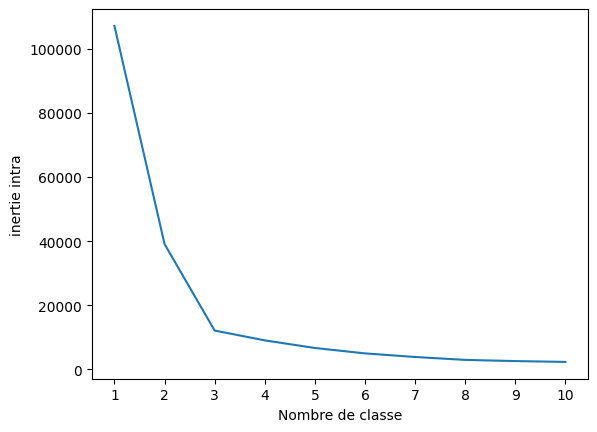

In [ ]:
# Methode elbow
plt.plot(range(1, 11), inertie_intra)
plt.xticks(range(1, 11))
plt.xlabel("Nombre de classe")
plt.ylabel("inertie intra")
plt.show()

In [ ]:
# Instantie du model
kmeans_model  = KMeans(n_clusters = 3, init = 'random', max_iter = 500)
# Entrainement du model
kmeans_model.fit(New_df)

KMeans(init='random', max_iter=500, n_clusters=3)

In [ ]:
# Prediction de la partition des donnees
Pred = kmeans_model.predict(New_df)

# Affichage de la partition
Pred[:200]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

<Axes: xlabel='None'>

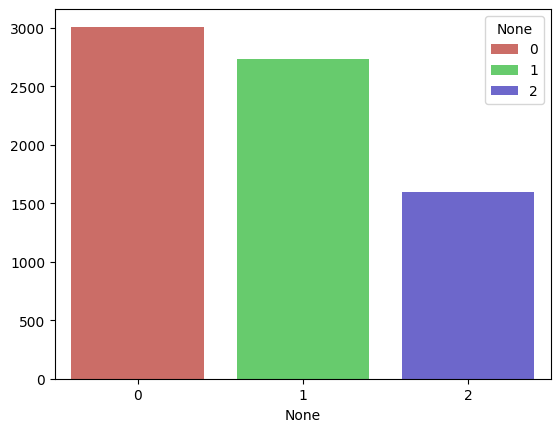

In [ ]:
# Nombre d'observations dans chaque classe
val = pd.Series(Pred).value_counts()

# Diagramme en barres
sns.barplot(x = val.index, y = val.values, hue = val.index, palette = sns.hls_palette(3))

<ipython-input-23-36763d2b6fbd>:3: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(x = New_df['PCA1'], y = New_df['PCA2'], hue = Pred, palette = sns.hls_palette(), legend = 'full')


<Axes: xlabel='PCA1', ylabel='PCA2'>

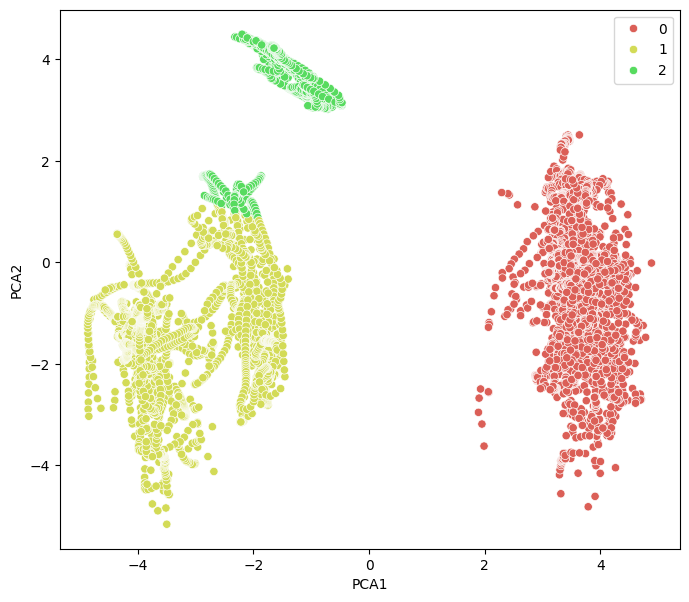

In [ ]:
# Visualisation des classes suivant les deux composantes de New_df
plt.figure(figsize=(8,7))
sns.scatterplot(x = New_df['PCA1'], y = New_df['PCA2'], hue = Pred, palette = sns.hls_palette(), legend = 'full')

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.utils import resample


subset_data, subset_pred = resample(New_df, Pred, n_samples=2000, random_state=42)


silhouette_K_MEANS = round(silhouette_score(subset_data, subset_pred), 2)
print(f'Silhouette Score sur sous-echantillon: {silhouette_K_MEANS}')


Silhouette Score sur sous-echantillon: 0.71


# 4- CAH

In [ ]:
 # Importation des fonctions dendrogram et linkage
from sklearn.utils import resample
from scipy.cluster.hierarchy import dendrogram, linkage

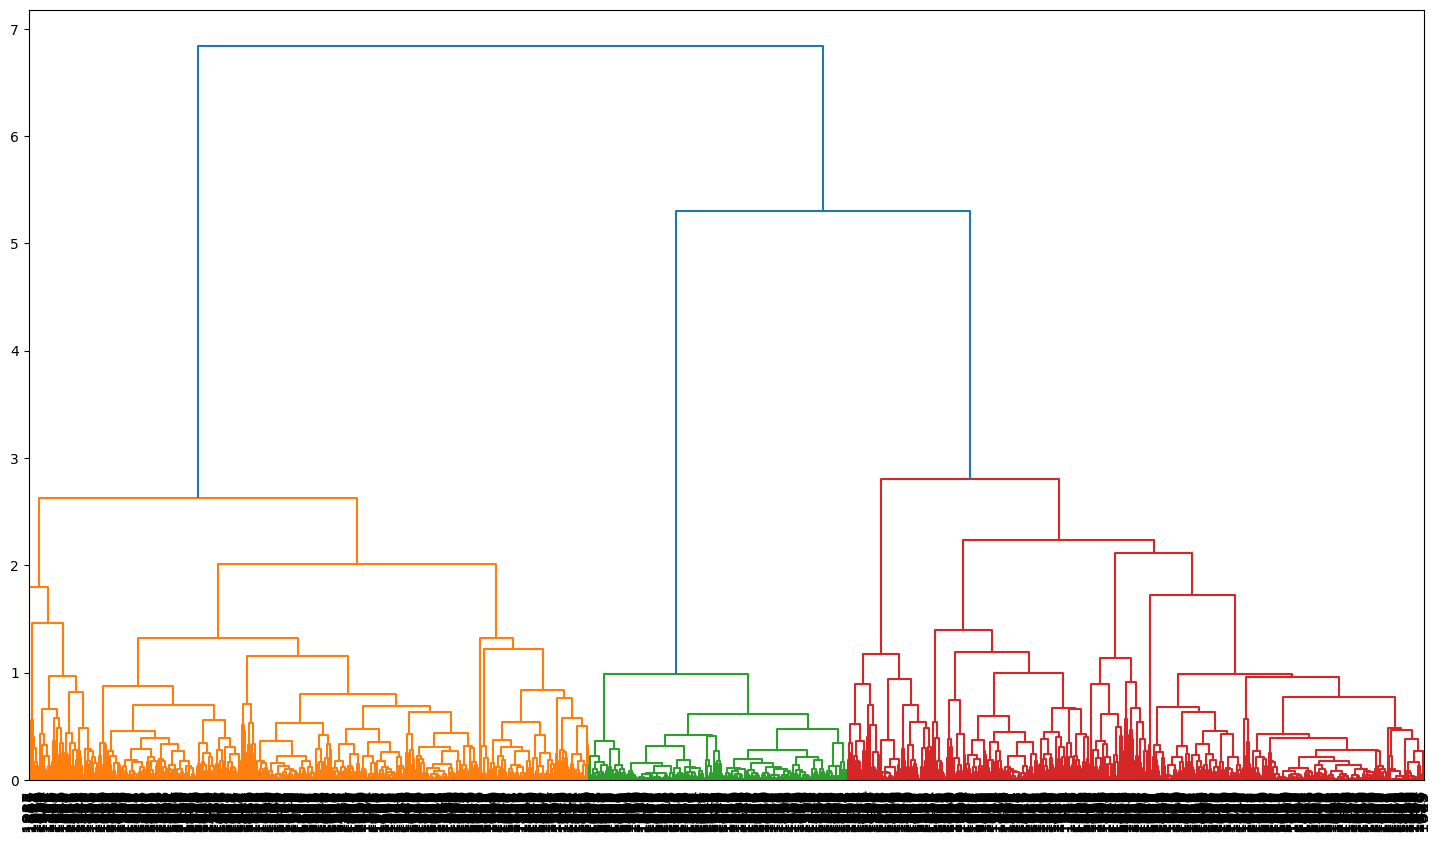

In [ ]:


# Sous-echantillonnage (1000 points)
subset_data = resample(New_df, n_samples=2000, random_state=42)

# Matrice des liaisons
Z = linkage(subset_data, 'average')

# Visualisation du dendrogramme
plt.figure(figsize=(18, 10))
dendro = dendrogram(Z, leaf_font_size=12, orientation='top')
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.utils import resample

# Sous-echantillonnage du dataset
subset_data = resample(New_df, n_samples=2000, random_state=42)


cah_model = AgglomerativeClustering(n_clusters=3, linkage='average')
cah_model.fit(subset_data)


AgglomerativeClustering(linkage='average', n_clusters=3)

In [ ]:
from sklearn.utils import resample

# Sous-echantillonnage des donnees pour reduire la charge memoire
New_df_sample = resample(New_df, n_samples=2000, random_state=42)

# Prédiction sur l'échantillon
pred1 = cah_model.fit_predict(New_df_sample)

# Affichage des premières 200 prédictions
print(pred1[:200])


[2 1 0 0 0 0 0 0 2 1 0 0 0 2 0 0 1 1 1 1 1 0 2 1 0 0 2 1 0 0 0 2 0 1 1 1 1
 1 1 1 1 1 2 1 1 0 1 1 2 1 0 0 0 1 2 1 2 0 1 1 1 1 1 1 1 1 2 1 2 0 2 1 1 1
 0 1 2 0 1 1 0 0 1 0 1 0 0 1 0 2 2 0 1 0 1 1 2 0 0 0 0 1 1 2 2 1 1 1 0 0 2
 0 2 1 1 2 0 1 0 1 1 0 0 1 1 1 2 0 0 2 1 0 0 2 0 0 0 1 2 2 0 2 1 2 0 2 0 2
 0 1 0 0 1 2 1 2 1 1 0 2 0 1 0 1 1 2 0 1 2 0 1 0 2 2 1 1 1 1 0 0 2 1 2 2 2
 1 0 0 1 2 0 1 0 0 0 1 1 2 1 0]


In [ ]:
# Nombre d'observations dans chaque classe
val1 = pd.Series(pred1).value_counts()

<ipython-input-30-beb798dd78fd>:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(x = val1.index, y = val1.values, hue = val1.index, palette = sns.hls_palette(4))


<Axes: xlabel='None'>

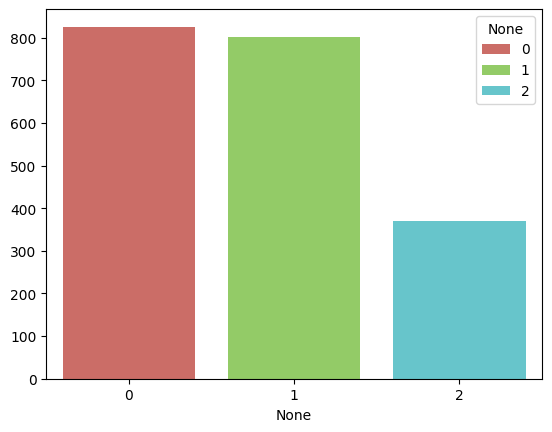

In [ ]:
# Diagramme en barres
sns.barplot(x = val1.index, y = val1.values, hue = val1.index, palette = sns.hls_palette(4))

In [ ]:
# Calcul du score de silhouette
silhouette_CAH = silhouette_score(New_df_sample, pred1)

# Affichage du score de silhouette
print(f'Silhouette Score: {silhouette_CAH}')

Silhouette Score: 0.7133420886400791


# 5- DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples=5)

In [ ]:
dbscan_model.fit(New_df)

DBSCAN()

In [ ]:
pred2 = dbscan_model.labels_
pred2[:200]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0])

In [ ]:
# Nombre d'observations dans chaque classe
val2 = pd.Series(pred2).value_counts()

<ipython-input-36-74baf83950a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val2.index, y=val2.values, palette=sns.hls_palette(4))
<ipython-input-36-74baf83950a0>:3: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=val2.index, y=val2.values, palette=sns.hls_palette(4))


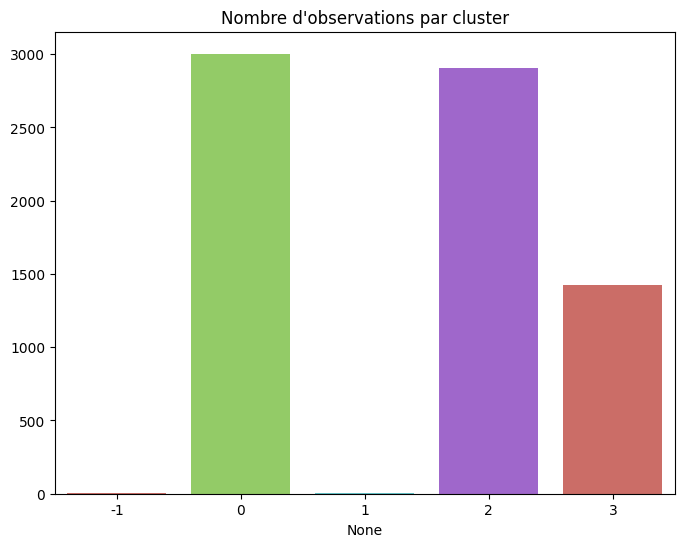

In [ ]:
# Diagramme en barres pour visualiser la repartition des clusters
plt.figure(figsize=(8,6))
sns.barplot(x=val2.index, y=val2.values, palette=sns.hls_palette(4))
plt.title('Nombre d\'observations par cluster')
plt.show()

<ipython-input-37-6b8b315fd0b3>:3: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='PCA1', y='PCA2', hue=pred2, data=New_df, palette=sns.hls_palette(4), legend='full')


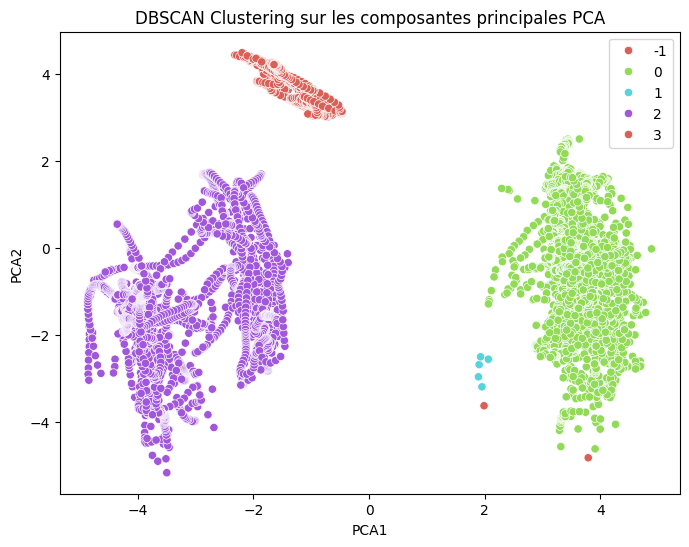

In [ ]:
# Visualisation des classes suivant les deux composantes principales de New_df (PCA1 et PCA2)
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue=pred2, data=New_df, palette=sns.hls_palette(4), legend='full')
plt.title('DBSCAN Clustering sur les composantes principales PCA')
plt.show()

In [ ]:
New_df = New_df.astype('float32')

if len(set(pred2)) > 1:
    silhouette_DBSCAN = silhouette_score(New_df, pred2)
    print(f'Silhouette Score : {round(silhouette_DBSCAN, 2)}')
else:
    print("Le score de silhouette ne peut pas être calculé car il n'y a qu'un seul cluster.")



Silhouette Score : 0.5699999928474426


# 6- GAUSSIAN MIXTURE MODEL (GMM)

In [ ]:
from sklearn.mixture import GaussianMixture
# Instancie du model GMM avec 2 clusters
gmm_model = GaussianMixture(n_components=2, covariance_type='full')

In [ ]:
# Entrainement du model sur les donnees PCA (New_df)
gmm_model.fit(New_df)

GaussianMixture(n_components=2)

In [ ]:
# Prediction de la partition des donnees
pred3 = gmm_model.predict(New_df)

In [ ]:
pred3[:200]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
# Nombre d'observations dans chaque classe
val3 = pd.Series(pred3).value_counts()

<ipython-input-44-3845acddd046>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val3.index, y=val3.values, palette=sns.hls_palette(4))
<ipython-input-44-3845acddd046>:3: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(x=val3.index, y=val3.values, palette=sns.hls_palette(4))


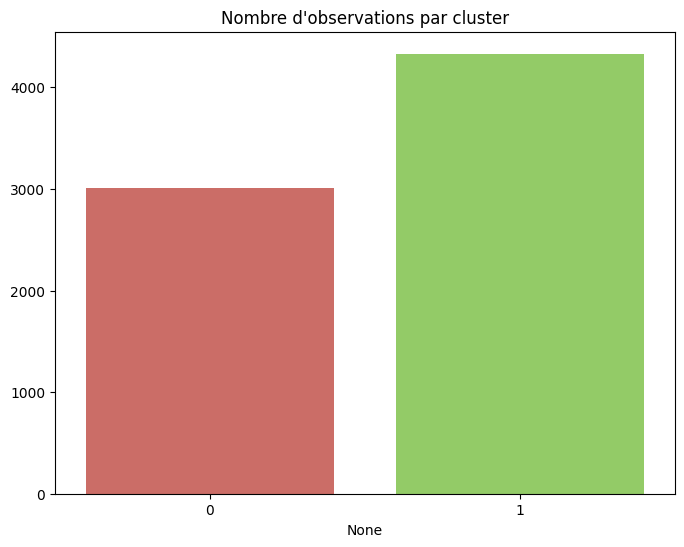

In [ ]:
# Diagramme en barres pour visualiser la repartition des clusters
plt.figure(figsize=(8,6))
sns.barplot(x=val3.index, y=val3.values, palette=sns.hls_palette(4))
plt.title('Nombre d\'observations par cluster')
plt.show()

<ipython-input-45-ff85dae65f91>:3: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(x='PCA1', y='PCA2', hue=pred3, data=New_df, palette=sns.hls_palette(4), legend='full')


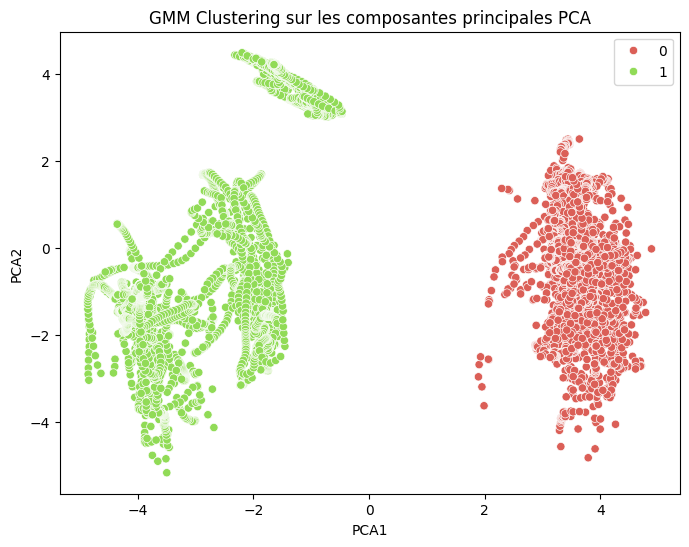

In [ ]:
# Visualisation des classes suivant les deux composantes principales de New_df (PCA1 et PCA2)
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue=pred3, data=New_df, palette=sns.hls_palette(4), legend='full')
plt.title('GMM Clustering sur les composantes principales PCA')
plt.show()

In [ ]:
# Calcul du score de silhouette
if len(set(pred3)) > 1:
    silhouette_GAUSSIAN_MIXTURE = silhouette_score(New_df, pred3)
    print(f'Silhouette Score : {round(silhouette_GAUSSIAN_MIXTURE, 2)}')
else:
    print("Le score de silhouette ne peut pas etre calcule car il n'y a qu'un seul cluster.")

Silhouette Score : 0.6200000047683716


# 7- COMPARAISON DES MODELS

In [ ]:
import plotly.express as px
from plotly.offline import iplot



# Regroupement des methodes et leurs scores respectifs
methodes = ['K-Means', 'CAH', 'DBSCAN', 'Gaussian Mixture']
scores = [silhouette_K_MEANS, silhouette_CAH, silhouette_DBSCAN, silhouette_GAUSSIAN_MIXTURE]

# Creation d'un dataframe
df_silhouette = pd.DataFrame({
    'Methodes': methodes,
    'Scores de silhouette': scores
})

# Creation d'un graphique en barres avec Plotly
fig = px.bar(df_silhouette,
             x='Methodes',
             y='Scores de silhouette',
             color='Methodes',
             labels={"y": "Scores de silhouette", "Methodes": "Méthodes de Clustering"},
             text=df_silhouette['Scores de silhouette'].apply(lambda x: f'{x:.2f}'),
             template="plotly_dark")

# Mise à jour du titre
fig.update_layout(
    title={
        'text': ("CLUSTERING ET ANALYSE SPATIALE DES MOUVEMENTS HUMAINS "
                 "A PARTIR DE DONNEES BIOMECANIQUES EN 3 DIMENSIONS (3D) "
                 "PAR MOHAMED FALILOU FALL"),
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 11}  #
    },
    margin={'t':250 },
    showlegend=False
)

# Mise a jour des traces
fig.update_traces(textfont={"family": "consolas", "size": 20})

# Print graphique
iplot(fig)


# 8- ANALYSE ET MODELISATION DES EMOTIONS A PARTIR DES DONNEES (INTRODUCTION)

## 9-1 La panique (Peur)

- Ces valeurs sont représentatives et peuvent être influencées par des facteurs physiologiques ou environnementaux spécifiques. Les valeurs des intervalles réelles peuvent varier en fonction des circonstances exactes et des données recueillies.


In [ ]:
# Défininition des intervalles pour les valeurs symbolisant la panique
data_panique = {
    'lhx': (5.0, 5.5),
    'lhy': (4.0, 4.5),
    'lhz': (1.5, 2.0),
    'rhx': (5.0, 5.5),
    'rhy': (4.0, 4.5),
    'rhz': (1.5, 2.0),
    'hx': (4.5, 5.5),
    'hy': (1.5, 2.0),
    'hz': (1.5, 2.0),
    'sx': (5.0, 5.5),
    'sy': (4.0, 4.5),
    'sz': (1.5, 2.0),
    'lwx': (4.5, 5.0),
    'lwy': (4.0, 4.5),
    'lwz': (1.5, 2.0),
    'rwx': (5.0, 5.5),
    'rwy': (4.0, 4.5),
    'rwz': (1.5, 2.0),
}



columns = list(data_panique.keys())
data = pd.DataFrame(data, columns=columns)

# Vérifions si les coordonnees sont dans les intervalles definis pour la panique
panique_mask = pd.Series(True, index=data.index)

for key, (min_val, max_val) in data_panique.items():
    if key in data.columns:
        panique_mask &= (data[key] >= min_val) & (data[key] <= max_val)

# Affichons les coordonnees qui symbolisent la panique
panique_data = data[panique_mask]

if not panique_data.empty:
    print("Les coordonnées qui symbolisent la panique :")
    print(panique_data)
else:
    print("Aucune coordonnée ne symbolise la panique.")


Les coordonnées qui symbolisent la panique :
         lhx       lhy       lhz       rhx       rhy       rhz        hx  \
2   5.357447  4.364039  1.500969  5.238928  4.347924  1.554150  5.037514   
46  5.135083  4.294317  1.538674  5.235981  4.351561  1.539456  5.061414   
47  5.131877  4.296307  1.538650  5.233859  4.351231  1.539052  5.053109   
48  5.129389  4.297771  1.538497  5.233158  4.351625  1.538987  5.045948   
49  5.120697  4.299195  1.538098  5.233967  4.352254  1.538935  5.036621   
50  5.119946  4.301163  1.537988  5.233966  4.352486  1.538924  5.023215   
51  5.043128  4.282294  1.538248  5.233922  4.353182  1.538757  4.999615   
52  5.026480  4.281172  1.537831  5.234625  4.353368  1.538672  4.980522   
53  5.024623  4.285524  1.537408  5.234477  4.353370  1.538572  4.970041   
55  5.243251  4.345447  1.500423  5.228973  4.356385  1.537141  4.939383   

          hy        hz        sx        sy        sz       lwx       lwy  \
2   1.618298  1.778774  5.059245  4.228004

## 9-2 L'indifference

In [ ]:
# Definition des intervalles pour les valeurs symbolisant l'indifference totale
data_indifference = {
    'lhx': (2.0, 3.0),
    'lhy': (2.0, 3.0),
    'lhz': (1.0, 1.5),
    'rhx': (2.0, 3.0),
    'rhy': (2.0, 3.0),
    'rhz': (1.0, 1.5),
    'hx': (2.5, 3.5),
    'hy': (1.0, 1.5),
    'hz': (1.0, 1.5),
    'sx': (2.0, 3.0),
    'sy': (2.0, 3.0),
    'sz': (1.0, 1.5),
    'lwx': (2.0, 2.5),
    'lwy': (2.0, 2.5),
    'lwz': (1.0, 1.5),
    'rwx': (2.0, 3.0),
    'rwy': (2.0, 2.5),
    'rwz': (1.0, 1.5),
}

columns = list(data_indifference.keys())
data = pd.DataFrame(data, columns=columns)

# Verifions si les coordonnees sont dans les intervalles definis pour l'indifference
indifference_mask = pd.Series(True, index=data.index)

for key, (min_val, max_val) in data_indifference.items():
    if key in data.columns:
        indifference_mask &= (data[key] >= min_val) & (data[key] <= max_val)

# Affichons les coordonnees qui symbolisent l'indifference
indifference_data = data[indifference_mask]

if not indifference_data.empty:
    print("Les coordonnées qui symbolisent l'indifférence :")
    print(indifference_data)
else:
    print("Aucune coordonnée ne symbolise l'indifférence.")


Aucune coordonnée ne symbolise l'indifférence.


## 9-3 La joie

In [ ]:
# Definition des intervalles pour les valeurs symbolisant la joie
data_joie = {
    'lhx': (6.0, 6.5),
    'lhy': (5.0, 5.5),
    'lhz': (2.0, 2.5),
    'rhx': (6.0, 6.5),
    'rhy': (5.0, 5.5),
    'rhz': (2.0, 2.5),
    'hx': (5.5, 6.5),
    'hy': (2.0, 2.5),
    'hz': (2.0, 2.5),
    'sx': (6.0, 6.5),
    'sy': (5.0, 5.5),
    'sz': (2.0, 2.5),
    'lwx': (5.5, 6.0),
    'lwy': (5.0, 5.5),
    'lwz': (2.0, 2.5),
    'rwx': (6.0, 6.5),
    'rwy': (5.0, 5.5),
    'rwz': (2.0, 2.5),
}

import pandas as pd

# Convertissons `data_joie` en DataFrame
columns = list(data_joie.keys())
data = pd.DataFrame(data, columns=columns)

# Verifions si les coordonnees sont dans les intervalles definis pour la joie
joie_mask = pd.Series(True, index=data.index)

for key, (min_val, max_val) in data_joie.items():
    if key in data.columns:
        joie_mask &= (data[key] >= min_val) & (data[key] <= max_val)

# Affichons les coordonnees qui symbolisent la joie
joie_data = data[joie_mask]

if not joie_data.empty:
    print("Les coordonnées qui symbolisent la joie :")
    print(joie_data)
else:
    print("Aucune coordonnée ne symbolise la joie.")


Aucune coordonnée ne symbolise la joie.


## 9-4 La tristesse

In [ ]:
# Definition des intervalles pour les valeurs symbolisant la tristesse
data_tristesse = {
    'lhx': (3.0, 4.0),
    'lhy': (2.0, 3.0),
    'lhz': (0.5, 1.5),
    'rhx': (3.0, 4.0),
    'rhy': (2.0, 3.0),
    'rhz': (0.5, 1.5),
    'hx': (2.0, 3.0),
    'hy': (0.5, 1.5),
    'hz': (0.5, 1.5),
    'sx': (3.0, 4.0),
    'sy': (2.0, 3.0),
    'sz': (0.5, 1.5),
    'lwx': (2.5, 3.5),
    'lwy': (2.0, 3.0),
    'lwz': (0.5, 1.5),
    'rwx': (3.0, 4.0),
    'rwy': (2.0, 3.0),
    'rwz': (0.5, 1.5),
}
import pandas as pd

# Convertissons `data_tristesse` en DataFrame
columns = list(data_tristesse.keys())
data = pd.DataFrame(data, columns=columns)

# Verifions si les coordonnees sont dans les intervalles definis pour la tristesse
tristesse_mask = pd.Series(True, index=data.index)

for key, (min_val, max_val) in data_tristesse.items():
    if key in data.columns:
        tristesse_mask &= (data[key] >= min_val) & (data[key] <= max_val)

# Affichons les coordonnees qui symbolisent la tristesse
tristesse_data = data[tristesse_mask]

if not tristesse_data.empty:
    print("Les coordonnées qui symbolisent la tristesse :")
    print(tristesse_data)
else:
    print("Aucune coordonnée ne symbolise la tristesse.")


Aucune coordonnée ne symbolise la tristesse.


## 9-5 La surprise

In [ ]:
# Definition des intervalles pour les valeurs symbolisant la surprise
data_surprise = {
    'lhx': (5.5, 6.0),
    'lhy': (4.0, 5.0),
    'lhz': (2.0, 2.5),
    'rhx': (5.5, 6.0),
    'rhy': (4.0, 5.0),
    'rhz': (2.0, 2.5),
    'hx': (5.0, 6.0),
    'hy': (3.0, 4.0),
    'hz': (2.0, 2.5),
    'sx': (5.5, 6.0),
    'sy': (4.0, 5.0),
    'sz': (2.0, 2.5),
    'lwx': (5.0, 5.5),
    'lwy': (4.5, 5.0),
    'lwz': (2.0, 2.5),
    'rwx': (5.5, 6.0),
    'rwy': (4.5, 5.0),
    'rwz': (2.0, 2.5),
}

import pandas as pd

# Convertissons `data_surprise` en DataFrame
columns = list(data_surprise.keys())
data = pd.DataFrame(data, columns=columns)

# Verifions si les coordonnees sont dans les intervalles definis pour la surprise
surprise_mask = pd.Series(True, index=data.index)

for key, (min_val, max_val) in data_surprise.items():
    if key in data.columns:
        surprise_mask &= (data[key] >= min_val) & (data[key] <= max_val)

# Affichons les coordonnees qui symbolisent la surprise
surprise_data = data[surprise_mask]

if not surprise_data.empty:
    print("Les coordonnées qui symbolisent la surprise :")
    print(surprise_data)
else:
    print("Aucune coordonnée ne symbolise la surprise.")


Aucune coordonnée ne symbolise la surprise.


In [ ]:
print("panique:", data_panique),
print("indifference:",data_indifference),
print("joie:",data_joie),
print("tristesse:",data_tristesse),
print("surprise:",data_surprise)

panique: {'lhx': (5.0, 5.5), 'lhy': (4.0, 4.5), 'lhz': (1.5, 2.0), 'rhx': (5.0, 5.5), 'rhy': (4.0, 4.5), 'rhz': (1.5, 2.0), 'hx': (4.5, 5.5), 'hy': (1.5, 2.0), 'hz': (1.5, 2.0), 'sx': (5.0, 5.5), 'sy': (4.0, 4.5), 'sz': (1.5, 2.0), 'lwx': (4.5, 5.0), 'lwy': (4.0, 4.5), 'lwz': (1.5, 2.0), 'rwx': (5.0, 5.5), 'rwy': (4.0, 4.5), 'rwz': (1.5, 2.0)}
indifference: {'lhx': (2.0, 3.0), 'lhy': (2.0, 3.0), 'lhz': (1.0, 1.5), 'rhx': (2.0, 3.0), 'rhy': (2.0, 3.0), 'rhz': (1.0, 1.5), 'hx': (2.5, 3.5), 'hy': (1.0, 1.5), 'hz': (1.0, 1.5), 'sx': (2.0, 3.0), 'sy': (2.0, 3.0), 'sz': (1.0, 1.5), 'lwx': (2.0, 2.5), 'lwy': (2.0, 2.5), 'lwz': (1.0, 1.5), 'rwx': (2.0, 3.0), 'rwy': (2.0, 2.5), 'rwz': (1.0, 1.5)}
joie: {'lhx': (6.0, 6.5), 'lhy': (5.0, 5.5), 'lhz': (2.0, 2.5), 'rhx': (6.0, 6.5), 'rhy': (5.0, 5.5), 'rhz': (2.0, 2.5), 'hx': (5.5, 6.5), 'hy': (2.0, 2.5), 'hz': (2.0, 2.5), 'sx': (6.0, 6.5), 'sy': (5.0, 5.5), 'sz': (2.0, 2.5), 'lwx': (5.5, 6.0), 'lwy': (5.0, 5.5), 'lwz': (2.0, 2.5), 'rwx': (6.0, 6.5)